### Sample Code for Generating Synthetic Background-Swapped Crop

Below, we provide sample code for generating a background-swapped crop given the foreground crop (segmented center cell) and background crop.

Note that this code does not reproduce the exact normalization done for some of the experiments as described in Section 3.2 of the paper. Specifically, for the Same Localization and Background Localization Swap experiments, normalization of the foreground and background was done based on respective protein data to ensure realistic synthetic crops.

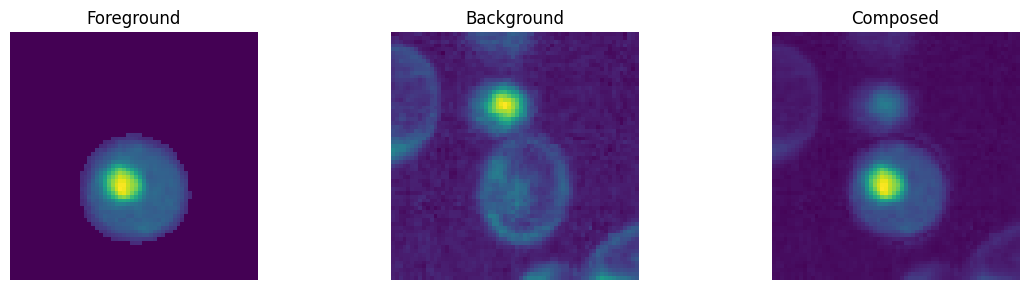

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def normalize(img):
    img = img.astype(np.float32)
    img -= img.min()
    img /= (img.max() + 1e-8)
    return img

def impose_foreground_on_background(
    foreground_path,
    background_path,
    normalize_foreground=True,
    normalize_background=True
):
    # Load images
    fg = np.array(Image.open(foreground_path)).astype(np.float32)
    bg = np.array(Image.open(background_path)).astype(np.float32)

    # Optional normalization
    if normalize_foreground:
        fg = normalize(fg)
    if normalize_background:
        bg = normalize(bg)

    # Check dimensions match
    if fg.shape != bg.shape:
        raise ValueError("Foreground and background must be the same shape")

    # Create binary mask from foreground (nonzero pixels)
    mask = fg > 0

    # Composite image: insert foreground into background
    composed = bg.copy()
    composed[mask] = fg[mask]

    return composed, fg, bg, mask

# --- Example usage ---
foreground_file = "foreground_example.tiff"
background_file = "background_example.tiff"

composed_img, fg_img, bg_img, fg_mask = impose_foreground_on_background(
    foreground_file,
    background_file,
    normalize_foreground=False,
    normalize_background=False
)

# --- Plot ---
plt.figure(figsize=(12, 3))
titles = ["Foreground", "Background", "Composed"]
for i, img in enumerate([fg_img, bg_img, composed_img]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
